In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [2]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [3]:
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

x = np.array([1, 2, 3])
# Remodelar la entrada al tamaño de muestra requerido x pasos_de_tiempo x características
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)


m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

print("Predicción de la red ", y_pred_model)
print("Prediccion debida al procesamiento ", o3)

wx =  [[-1.2100198  -0.97736853]]  wh =  [[ 0.6786858   0.73442876]
 [ 0.73442876 -0.6786858 ]]  bh =  [0. 0.]  wy = [[-0.7360222 ]
 [-0.41768873]] by =  [0.]
1/1 [==============================] - 1s 592ms/step
h1 =  [[-1.21001983 -0.97736853]] h2 =  [[-3.95907047 -2.1800843 ]] h3 =  [[-7.91814095 -4.36016861]]
Predicción de la red  [[7.6491203]]
Prediccion debida al procesamiento  [[7.64912059]]


In [4]:
# El parámetro split_percent define la proporción de ejemplos de entrenamiento
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Punto para dividir los datos en entrenamiento y prueba
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [5]:

# Preparar la entrada X y el objetivo Y
def get_XY(dat, time_steps):
    # Indices del arreglo objetivo
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Preparar X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 2s - loss: 0.0282 - 2s/epoch - 10ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0186 - 419ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0139 - 434ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0112 - 426ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0094 - 401ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0082 - 388ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0073 - 388ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0064 - 394ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0061 - 407ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0055 - 400ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0054 - 400ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0050 - 385ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0047 - 411ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0046 - 406ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0044 - 420ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.0

In [6]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Entrenamiento RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error

2/2 [==============================] - 0s 3ms/step


Entrenamiento RMSE: 0.061 RMSE
Test RMSE: 0.078 RMSE


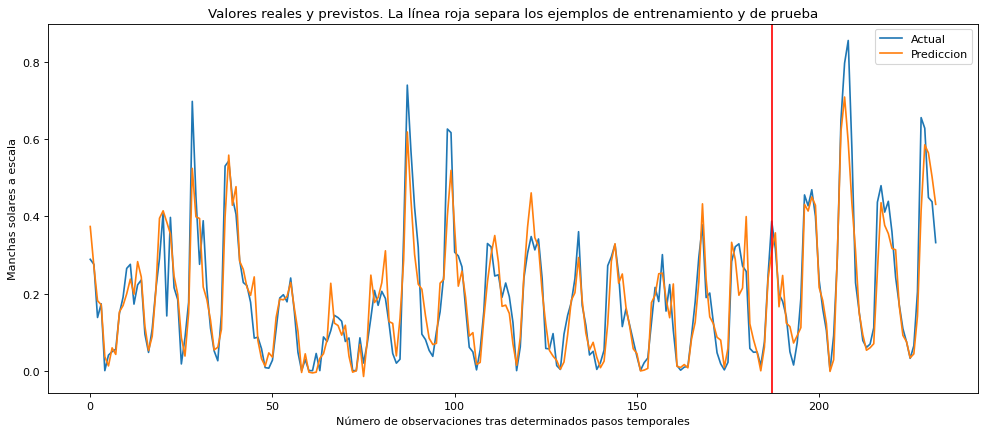

In [7]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Prediccion'])
    plt.xlabel('Número de observaciones tras determinados pasos temporales')
    plt.ylabel('Manchas solares a escala')
    plt.title('Valores reales y previstos. La línea roja separa los ejemplos de entrenamiento y de prueba')
plot_result(trainY, testY, train_predict, test_predict)
print_error(trainY, testY, train_predict, test_predict)

Epoch 1/30
225/225 - 1s - loss: 0.0322 - 1s/epoch - 6ms/step
Epoch 2/30
225/225 - 1s - loss: 0.0203 - 522ms/epoch - 2ms/step
Epoch 3/30
225/225 - 0s - loss: 0.0152 - 478ms/epoch - 2ms/step
Epoch 4/30
225/225 - 0s - loss: 0.0120 - 433ms/epoch - 2ms/step
Epoch 5/30
225/225 - 0s - loss: 0.0086 - 442ms/epoch - 2ms/step
Epoch 6/30
225/225 - 0s - loss: 0.0067 - 428ms/epoch - 2ms/step
Epoch 7/30
225/225 - 0s - loss: 0.0057 - 426ms/epoch - 2ms/step
Epoch 8/30
225/225 - 0s - loss: 0.0051 - 422ms/epoch - 2ms/step
Epoch 9/30
225/225 - 1s - loss: 0.0049 - 505ms/epoch - 2ms/step
Epoch 10/30
225/225 - 0s - loss: 0.0048 - 430ms/epoch - 2ms/step
Epoch 11/30
225/225 - 0s - loss: 0.0048 - 422ms/epoch - 2ms/step
Epoch 12/30
225/225 - 0s - loss: 0.0047 - 463ms/epoch - 2ms/step
Epoch 13/30
225/225 - 0s - loss: 0.0045 - 456ms/epoch - 2ms/step
Epoch 14/30
225/225 - 0s - loss: 0.0046 - 453ms/epoch - 2ms/step
Epoch 15/30
225/225 - 0s - loss: 0.0047 - 434ms/epoch - 2ms/step
Epoch 16/30
225/225 - 0s - loss: 0.00

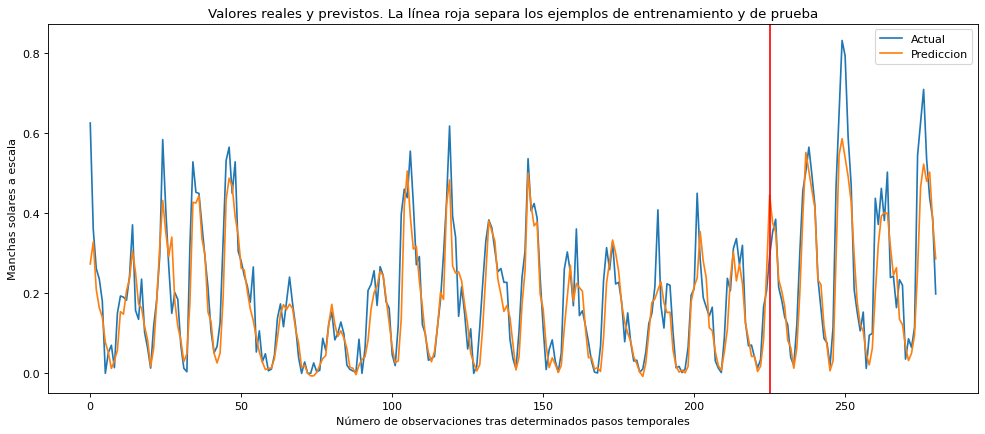

In [8]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)


Epoch 1/35
225/225 - 2s - loss: 0.0187 - 2s/epoch - 7ms/step
Epoch 2/35
225/225 - 0s - loss: 0.0103 - 490ms/epoch - 2ms/step
Epoch 3/35
225/225 - 0s - loss: 0.0080 - 442ms/epoch - 2ms/step
Epoch 4/35
225/225 - 0s - loss: 0.0067 - 462ms/epoch - 2ms/step
Epoch 5/35
225/225 - 0s - loss: 0.0059 - 478ms/epoch - 2ms/step
Epoch 6/35
225/225 - 0s - loss: 0.0055 - 495ms/epoch - 2ms/step
Epoch 7/35
225/225 - 0s - loss: 0.0052 - 484ms/epoch - 2ms/step
Epoch 8/35
225/225 - 1s - loss: 0.0048 - 534ms/epoch - 2ms/step
Epoch 9/35
225/225 - 0s - loss: 0.0048 - 495ms/epoch - 2ms/step
Epoch 10/35
225/225 - 1s - loss: 0.0044 - 521ms/epoch - 2ms/step
Epoch 11/35
225/225 - 0s - loss: 0.0045 - 452ms/epoch - 2ms/step
Epoch 12/35
225/225 - 0s - loss: 0.0042 - 476ms/epoch - 2ms/step
Epoch 13/35
225/225 - 0s - loss: 0.0042 - 479ms/epoch - 2ms/step
Epoch 14/35
225/225 - 0s - loss: 0.0041 - 482ms/epoch - 2ms/step
Epoch 15/35
225/225 - 0s - loss: 0.0041 - 493ms/epoch - 2ms/step
Epoch 16/35
225/225 - 1s - loss: 0.00

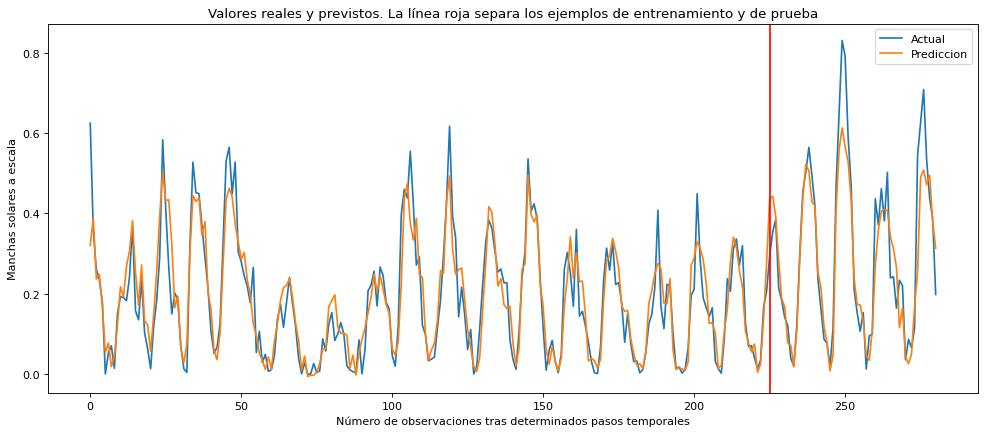

In [9]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=35, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/25
225/225 - 1s - loss: 0.0109 - 1s/epoch - 6ms/step
Epoch 2/25
225/225 - 0s - loss: 0.0055 - 423ms/epoch - 2ms/step
Epoch 3/25
225/225 - 0s - loss: 0.0053 - 444ms/epoch - 2ms/step
Epoch 4/25
225/225 - 0s - loss: 0.0048 - 427ms/epoch - 2ms/step
Epoch 5/25
225/225 - 0s - loss: 0.0047 - 436ms/epoch - 2ms/step
Epoch 6/25
225/225 - 0s - loss: 0.0046 - 434ms/epoch - 2ms/step
Epoch 7/25
225/225 - 0s - loss: 0.0045 - 418ms/epoch - 2ms/step
Epoch 8/25
225/225 - 0s - loss: 0.0043 - 427ms/epoch - 2ms/step
Epoch 9/25
225/225 - 0s - loss: 0.0042 - 434ms/epoch - 2ms/step
Epoch 10/25
225/225 - 0s - loss: 0.0042 - 429ms/epoch - 2ms/step
Epoch 11/25
225/225 - 0s - loss: 0.0041 - 424ms/epoch - 2ms/step
Epoch 12/25
225/225 - 0s - loss: 0.0041 - 432ms/epoch - 2ms/step
Epoch 13/25
225/225 - 0s - loss: 0.0041 - 424ms/epoch - 2ms/step
Epoch 14/25
225/225 - 0s - loss: 0.0040 - 431ms/epoch - 2ms/step
Epoch 15/25
225/225 - 0s - loss: 0.0039 - 425ms/epoch - 2ms/step
Epoch 16/25
225/225 - 0s - loss: 0.00

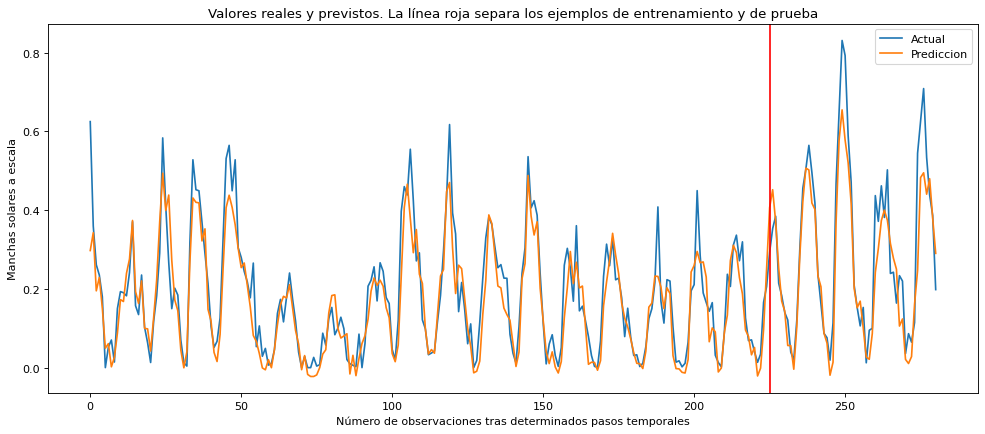

In [10]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/25
225/225 - 1s - loss: 0.1067 - 1s/epoch - 6ms/step
Epoch 2/25
225/225 - 0s - loss: 0.0436 - 477ms/epoch - 2ms/step
Epoch 3/25
225/225 - 1s - loss: 0.0307 - 544ms/epoch - 2ms/step
Epoch 4/25
225/225 - 0s - loss: 0.0210 - 487ms/epoch - 2ms/step
Epoch 5/25
225/225 - 1s - loss: 0.0146 - 510ms/epoch - 2ms/step
Epoch 6/25
225/225 - 0s - loss: 0.0096 - 479ms/epoch - 2ms/step
Epoch 7/25
225/225 - 0s - loss: 0.0070 - 442ms/epoch - 2ms/step
Epoch 8/25
225/225 - 0s - loss: 0.0057 - 445ms/epoch - 2ms/step
Epoch 9/25
225/225 - 0s - loss: 0.0051 - 443ms/epoch - 2ms/step
Epoch 10/25
225/225 - 0s - loss: 0.0048 - 440ms/epoch - 2ms/step
Epoch 11/25
225/225 - 0s - loss: 0.0045 - 427ms/epoch - 2ms/step
Epoch 12/25
225/225 - 0s - loss: 0.0044 - 421ms/epoch - 2ms/step
Epoch 13/25
225/225 - 0s - loss: 0.0044 - 430ms/epoch - 2ms/step
Epoch 14/25
225/225 - 0s - loss: 0.0043 - 425ms/epoch - 2ms/step
Epoch 15/25
225/225 - 1s - loss: 0.0043 - 560ms/epoch - 2ms/step
Epoch 16/25
225/225 - 1s - loss: 0.00

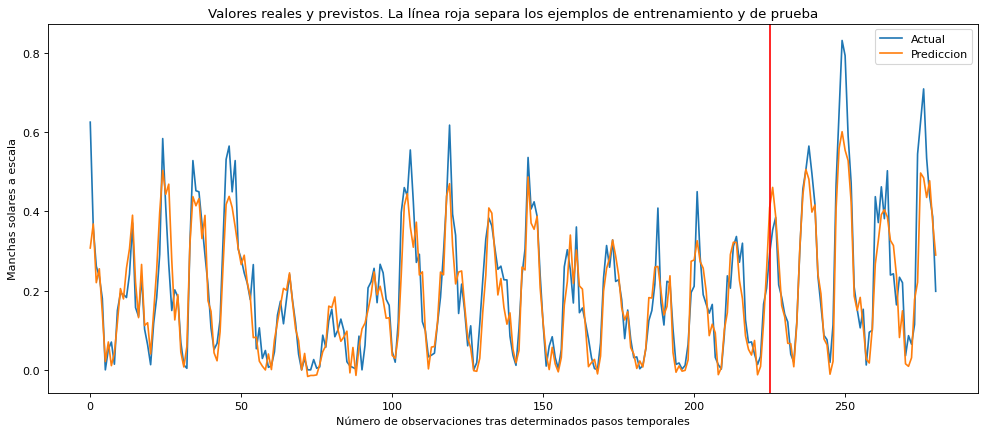

In [11]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/35
225/225 - 1s - loss: 0.1268 - 1s/epoch - 6ms/step
Epoch 2/35
225/225 - 0s - loss: 0.0253 - 443ms/epoch - 2ms/step
Epoch 3/35
225/225 - 0s - loss: 0.0149 - 417ms/epoch - 2ms/step
Epoch 4/35
225/225 - 0s - loss: 0.0106 - 401ms/epoch - 2ms/step
Epoch 5/35
225/225 - 0s - loss: 0.0086 - 419ms/epoch - 2ms/step
Epoch 6/35
225/225 - 0s - loss: 0.0076 - 405ms/epoch - 2ms/step
Epoch 7/35
225/225 - 0s - loss: 0.0068 - 409ms/epoch - 2ms/step
Epoch 8/35
225/225 - 0s - loss: 0.0062 - 408ms/epoch - 2ms/step
Epoch 9/35
225/225 - 0s - loss: 0.0054 - 409ms/epoch - 2ms/step
Epoch 10/35
225/225 - 0s - loss: 0.0054 - 407ms/epoch - 2ms/step
Epoch 11/35
225/225 - 0s - loss: 0.0050 - 420ms/epoch - 2ms/step
Epoch 12/35
225/225 - 0s - loss: 0.0048 - 403ms/epoch - 2ms/step
Epoch 13/35
225/225 - 0s - loss: 0.0048 - 408ms/epoch - 2ms/step
Epoch 14/35
225/225 - 0s - loss: 0.0044 - 410ms/epoch - 2ms/step
Epoch 15/35
225/225 - 0s - loss: 0.0043 - 416ms/epoch - 2ms/step
Epoch 16/35
225/225 - 0s - loss: 0.00

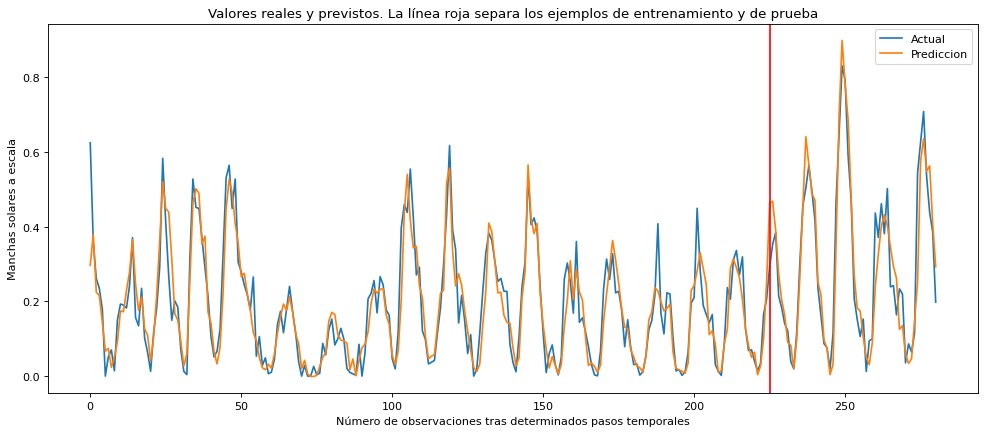

In [12]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['linear', 'linear'])

model.fit(trainX, trainY, epochs=35, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/25
225/225 - 1s - loss: 0.2140 - 1s/epoch - 6ms/step
Epoch 2/25
225/225 - 0s - loss: 0.0842 - 420ms/epoch - 2ms/step
Epoch 3/25
225/225 - 0s - loss: 0.0661 - 409ms/epoch - 2ms/step
Epoch 4/25
225/225 - 0s - loss: 0.0549 - 413ms/epoch - 2ms/step
Epoch 5/25
225/225 - 0s - loss: 0.0469 - 404ms/epoch - 2ms/step
Epoch 6/25
225/225 - 0s - loss: 0.0412 - 406ms/epoch - 2ms/step
Epoch 7/25
225/225 - 0s - loss: 0.0364 - 418ms/epoch - 2ms/step
Epoch 8/25
225/225 - 0s - loss: 0.0323 - 408ms/epoch - 2ms/step
Epoch 9/25
225/225 - 0s - loss: 0.0286 - 446ms/epoch - 2ms/step
Epoch 10/25
225/225 - 0s - loss: 0.0257 - 417ms/epoch - 2ms/step
Epoch 11/25
225/225 - 0s - loss: 0.0231 - 406ms/epoch - 2ms/step
Epoch 12/25
225/225 - 0s - loss: 0.0208 - 405ms/epoch - 2ms/step
Epoch 13/25
225/225 - 0s - loss: 0.0189 - 408ms/epoch - 2ms/step
Epoch 14/25
225/225 - 0s - loss: 0.0173 - 410ms/epoch - 2ms/step
Epoch 15/25
225/225 - 0s - loss: 0.0159 - 413ms/epoch - 2ms/step
Epoch 16/25
225/225 - 0s - loss: 0.01

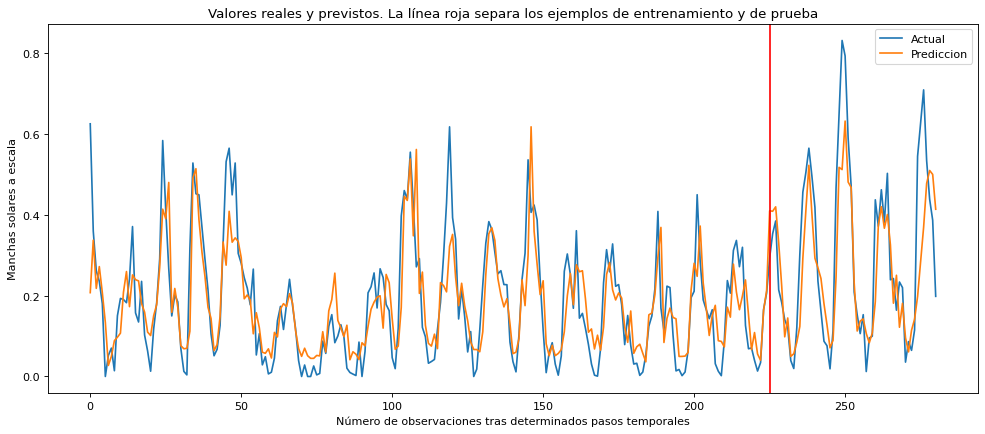

In [13]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['linear', 'linear'])

model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)